# Media Case Study
Problem Statement: A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
media = pd.read_csv('./Hotstarcode-for-udemy/code_for_udemy/mediacompany.csv')
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [3]:
# Remove column
media = media.drop('Unnamed: 7', axis=1)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [4]:
# Convert date to datetime data type
media['Date'] = pd.to_datetime(media['Date']).dt.date
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [5]:
# Create a derive column called Days to represent the no. of days since the show started
from datetime import date
d0 = date(2017, 2, 28)
d1 = media['Date']
delta = d1-d0
media['Day'] = delta
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [6]:
# Cleaning days
media['Day'] = media['Day'].astype(str)
media['Day'] = media['Day'].map(lambda x: x[0:2])
media['Day'] = media['Day'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


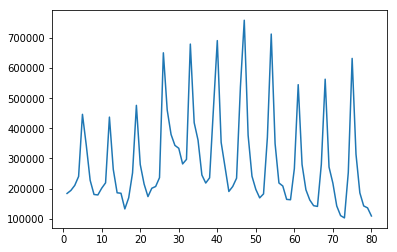

In [7]:
# days vs views_show
plt.plot(media['Day'], media['Views_show'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


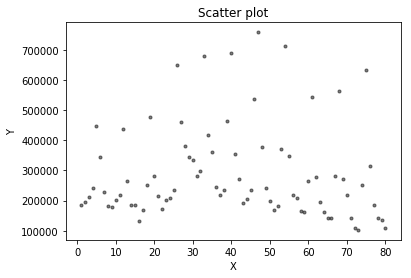

In [8]:
colors = (0,0,0)
area = np.pi*3
plt.scatter(media.Day, media.Views_show, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [9]:
# Derived metrics
# Weekday, Sunday=1, Saturday=7
media['Weekday'] = (media['Day']+3)%7
media['Weekday'].replace(0,7, inplace=True)
media['Weekday'] = media['Weekday'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,Weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


# Running first model with Visitors and Weekday

In [10]:
x = media[['Visitors', 'Weekday']]
y = media['Views_show']

In [11]:
import statsmodels.api as sm
x = sm.add_constant(x)
lm_1 = sm.OLS(y, x).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           8.01e-12
Time:                        20:14:38   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [12]:
# The above score is not bad, but let's see if we can improve our score
# Create weekend variable, with 1 if it's weekend and 0 if it's weekdays
def cond(i):
    if i%7 == 5:return 1
    elif i%7 == 4:return 1
    else:return 0

media['Weekend'] = [cond(i) for i in media['Day']]
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,Weekday,Weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


In [13]:
# Creating a new model with Visitors and Weekend
x = media[['Visitors', 'Weekend']]
x = sm.add_constant(x)
y = media['Views_show']
lm_2 = sm.OLS(y,x).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           2.51e-12
Time:                        20:14:38   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

In [14]:
# Third model
x = media[['Visitors', 'Character_A', 'Weekend']]
y = media['Views_show']

In [15]:
x = sm.add_constant(x)
lm_3 = sm.OLS(y, x).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           1.53e-14
Time:                        20:14:38   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [16]:
# Create lag variable
media['Lag_views'] = np.roll(media['Views_show'], 1)
media.Lag_views.replace(108961, 0, inplace=True)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,Weekday,Weekend,Lag_views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


In [17]:
# Creating our fourth model
x = media[['Visitors', 'Weekend', 'Character_A', 'Lag_views']]
y = media['Views_show']

In [18]:
x = sm.add_constant(x)
lm_4 = sm.OLS(y,x).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           3.16e-21
Time:                        20:14:38   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

In [19]:
# So we can we in the above summary that though our R-square value is quite good but if we notice P-value for visitors
# has gone a little high, 16.7%. It can be improved also our new column Lag_views is not making much sense here.
# So we can go ahead and remove this column

In [20]:
# Creating our fifth model, removing our previous columns and adding new one to check if it improves our model
x = media[['Weekend', 'Character_A', 'Views_platform']]
y = media['Views_show']

In [21]:
x = sm.add_constant(x)
lm_5 = sm.OLS(y, x).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           3.59e-15
Time:                        20:14:38   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

In [22]:
# We can observe that our R-square value has improved a bit
# Let's create a different model and try to improve

In [23]:
# Creating sixth model
x = media[['Weekend', 'Character_A', 'Visitors']]
y = media['Views_show']

In [24]:
x = sm.add_constant(x)
lm_6 = sm.OLS(y, x).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           1.53e-14
Time:                        20:14:39   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

#### Running seventh model (lm7) Character_A, weekend, Visitors & Ad_impressions

In [25]:
# Adding new variable Ad_impressions
x = media[['Character_A', 'Weekend', 'Visitors', 'Ad_impression']]
x = sm.add_constant(x)
lm_7 = sm.OLS(y, x).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           1.10e-25
Time:                        20:14:39   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

#### Running eight model (lm8) Character_A, weekend & Ad_impressions

In [26]:
# We can notice that previously our Character_A values was +ve, but now it's -ve.
# Also our p-value for Visitors and Character_A is very high
# So we'll remove the variables one by one, let's remove 'Visitors' and check the model
x = media[['Character_A', 'Weekend', 'Ad_impression']]
x = sm.add_constant(x)
lm_8 = sm.OLS(y,x).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           1.05e-26
Time:                        20:14:39   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

In [27]:
# In the above summary our R-square value is really good, but Character_A is still -ve.
# Also other values are in the power of 5 and 4 but Ad_impression is very low. Reason could be Ad_impression is in
# millions.

#### Running seventh model (lm7) Character_A, weekend, Visitors, ad_impressions_million & Cricket_match_india

In [28]:
# So here we'll divide Ad_impression with million and also add Cricket_match_india to see it's impact
media['Ad_impression_million'] = media['Ad_impression']/1000000

In [29]:
x = media[['Visitors', 'Character_A', 'Weekend', 'Ad_impression_million', 'Cricket_match_india']]
x = sm.add_constant(x)
lm_7 = sm.OLS(y, x).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     60.67
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           8.61e-25
Time:                        20:14:39   Log-Likelihood:                -1003.9
No. Observations:                  80   AIC:                             2020.
Df Residuals:                      74   BIC:                             2034.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.867e+

In [30]:
# In the above summary we can see that our r-squared value is pretty awesome above 80 also ad_impression_million value
# has improved.
# But our character_A and cricket_match_india is -ve also our p-value is very high.
# Let's give more importance to p-value and recreate this model removing cricket_match_india and visitors

#### Running seventh model (lm7) Character_A, weekend & ad_impressions_million

In [31]:
x = media[['Character_A', 'Weekend', 'Ad_impression_million']]
x = sm.add_constant(x)
lm_7 = sm.OLS(y,x).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           1.05e-26
Time:                        20:14:39   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

#### Making prediction with current model

In [33]:
x = media[['Character_A', 'Weekend', 'Ad_impression_million']]
x = sm.add_constant(x)
y_pred = lm_7.predict(x)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, y_pred)
r2_value = r2_score(media.Views_show, y_pred)

In [35]:
print('MSE: ', mse)
print('R-square value: ', r2_value)

MSE:  4677651616.253406
R-square value:  0.8026434468575651


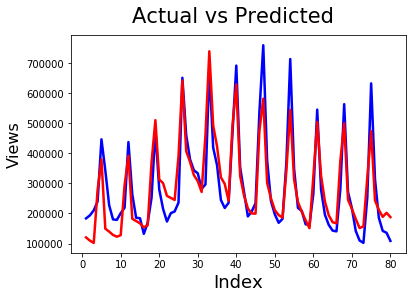

In [37]:
# Actual vs Predicted
c = [i for i in range (1, 81, 1)]
fig = plt.figure()
plt.plot(c, media.Views_show, linestyle='-', color='blue', linewidth=2.5)
plt.plot(c, y_pred, linestyle='-', color='red', linewidth=2.5)
fig.suptitle('Actual vs Predicted', fontsize=21)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Views', fontsize=16)
plt.show()

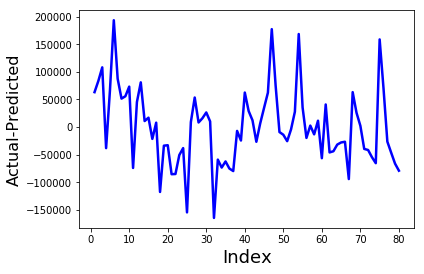

In [38]:
# Error terms
plt.plot(c, media.Views_show-y_pred, color='blue', linestyle='-', linewidth=2.5)
fig.suptitle('Error terms', fontsize=21)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Actual-Predicted', fontsize=16)
plt.show()

#### Prediction with lm_6 model

In [39]:
# So, our previous model prediction and error terms are pretty good. Let's see for the model lm_6 that we build earlier.
x = media[['Weekend', 'Character_A', 'Visitors']]
x = sm.add_constant(x)
y_pred_lm6 = lm_6.predict(x)

In [40]:
# MSE and R_squared value
mse_lm6 = mean_squared_error(media.Views_show, y_pred_lm6)
r2_value_lm6 = r2_score(media.Views_show, y_pred_lm6)
print('MSE: ', mse_lm6)
print('R-square value: ', r2_value_lm6)

MSE:  9815432480.45152
R-square value:  0.5858734080979341


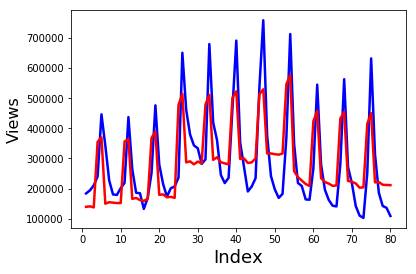

In [41]:
# Actual vs Predicted
c = [i for i in range (1, 81, 1)]
plt.plot(c, media.Views_show, color='blue', linestyle='-', linewidth=2.5)
plt.plot(c, y_pred_lm6, color='red', linestyle='-', linewidth=2.5)
fig.suptitle('Actual vs Predicted', fontsize=21)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Views', fontsize=16)
plt.show()

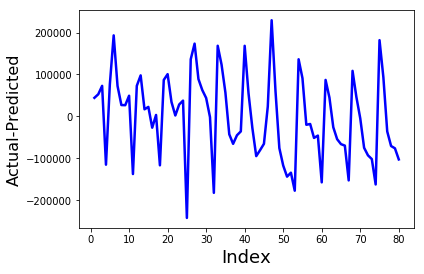

In [44]:
# Error terms
plt.plot(c, media.Views_show-y_pred_lm6, color='blue', linestyle='-', linewidth=2.5)
fig.suptitle('Error Terms', fontsize=21)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Actual-Predicted', fontsize=16)
plt.show()

# Conclusion
So we can conclude that the previous model was better than the above model since it's MSE and R-square values are better
Also the predicted values are quite closer to the actual in lm_7 model. So maybe the company should focus on the attributes 'Character_A', 'Weekend', 'Ad_impression_million' than the others.
In this way we can simply keep trying with different combination to build our model and check values. And stop when
we satisfy with our model.